<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Power-Production-Data-Set" data-toc-modified-id="Power-Production-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Power Production Data Set</a></span><ul class="toc-item"><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Removing Outliers</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-and-Polynomial-Regression" data-toc-modified-id="Linear-Regression-and-Polynomial-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression and Polynomial Regression</a></span></li><li><span><a href="#Decision-Tree-Regression-and-Random-Forest-Regression" data-toc-modified-id="Decision-Tree-Regression-and-Random-Forest-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree Regression and Random Forest Regression</a></span></li><li><span><a href="#Passing-New-Data-to-the-Regression-Models" data-toc-modified-id="Passing-New-Data-to-the-Regression-Models-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Passing New Data to the Regression Models</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Using-the-Model" data-toc-modified-id="Using-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using the Model</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Machine Learning: Predicting Power Production

This notebook builds a predictive machine learning model based on the speed and power data in the powerproduction.csv file. This model will be used in the web application power.py, which allows the user to enter a wind speed and returns an estimate of the power output. Below I assess five different models, two linear, two non-linear and a neural network, to determine which would be the most accurate and most efficient for the application. When this notebook is run the final model  is exported to a pickle file, model.pkl where it can be used by the Flask app.

In [1]:
# Importing libraries
# Loading and examining data
import pandas as pd
# Converting data to numpy arrays for modelling
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("fivethirtyeight")
# Splitting the data
from sklearn.model_selection import train_test_split 
# Regression modelling
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
# Model evaluation
from sklearn import metrics
# Creating neural network
import tensorflow.keras as kr
# Exporting model to file
import pickle

## Power Production Data Set

The power production data set is loaded and printed in full below and descriptive statistics are generated.

In [2]:
# Loading the dataset
data = pd.read_csv("powerproduction.csv")

# View all data
pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [3]:
# Description of the data
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The descriptive statistics tell us that there are 500 rows in the data set. The data looks to be presented in ascending order of measured wind speed, which starts at 0 and tops out at 25. The mean wind speed is 12.5, which is very close to the median of the range, indicating a symmetric distribution. Power ranges between 0-114 with a mean of 48. It is also noteworthy that the first 5 and last 10 entries have power values of 0.  

In [4]:
# Head of data set
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# Tail of data set
data.tail(10)

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


To see whether there is a relationship between the variables, a simple correlation is calculated below. The resulting Pearson correlation coefficient (*r*) indicates a strong positive relationship between wind speed and power,[<sup>1</sup>](https://www.statisticssolutions.com/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.) i.e. as one increases, so does the other. 

In [6]:
# Correlation
data[['speed', 'power']].corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


The data is visualised below. Wind speed looks to be quite uniformly distributed, while power seems to have a disproportionate number of zero values and values around the 100 mark. The correlation indicated above seems to be reflected in the scatterplot with power generally increasing alongside speed.   

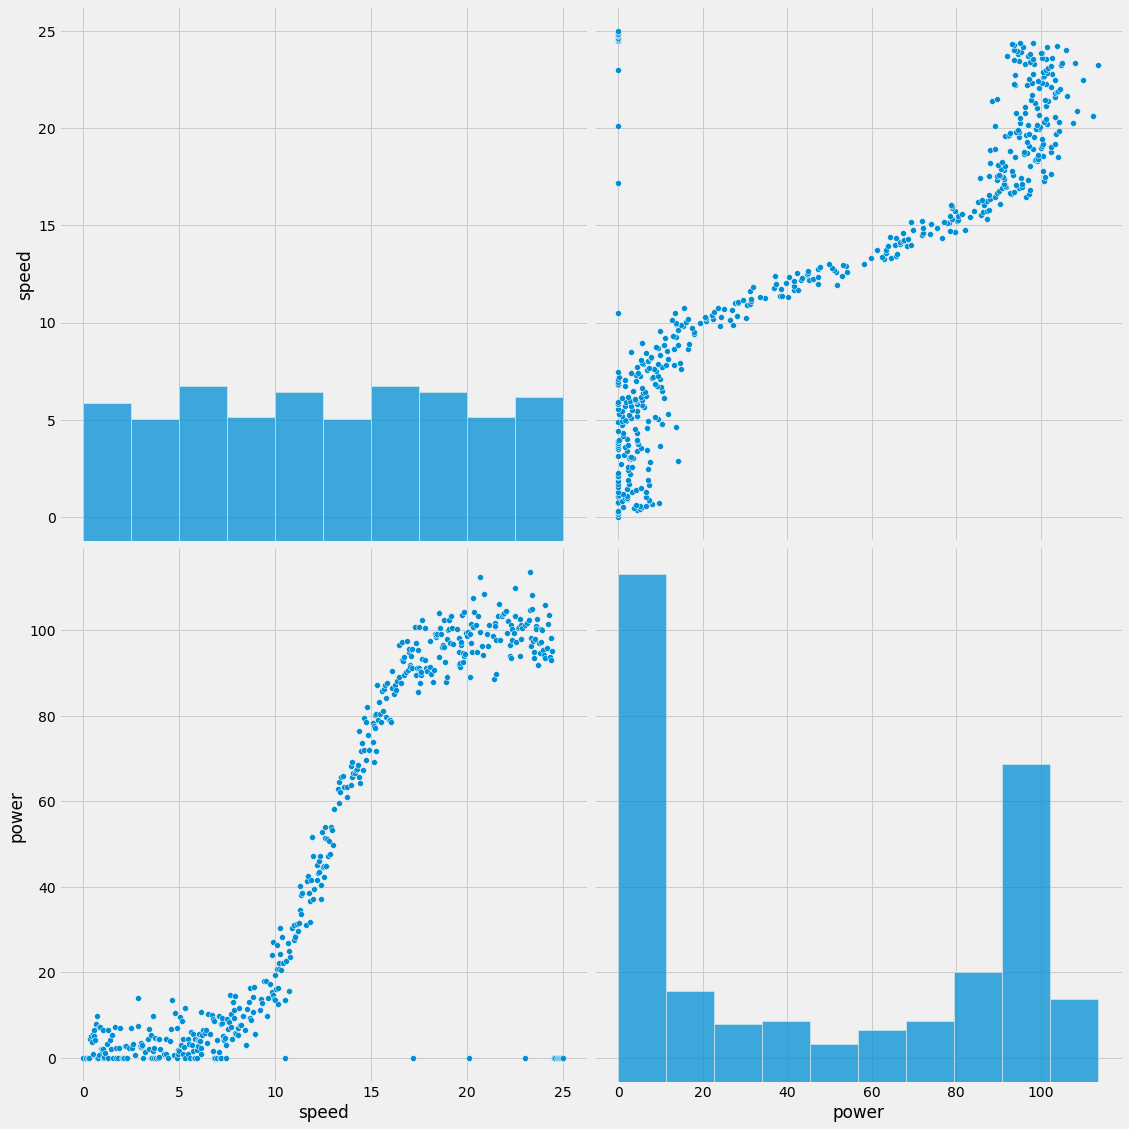

In [7]:
sns.pairplot(data, height=8)
plt.show()

Looking more closely at the scatterplot, the data is quite flat at the beginning, but between the values of about 8-18, power appears to sharply increase as speed increases and then looks to max out at a certain level where it flattens out again. This s-shaped curve bears a resemblance to a sigmoid function,[<sup>2</sup>](https://en.wikipedia.org/wiki/Sigmoid_function) which has been observed to naturally occur in wind turbine power curves.[<sup>3</sup>](https://neerajdhanraj.medium.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f) This is due to the way in which wind turbines are built to operate and can be boiled down to four characteristics:

- Cut-in speed: the speed at which electricity begins to be generated. Wind speeds below this are not strong enough to turn the blades and therefore no power is generated. 
- Rated output speed: The maximum wind speed that a turbine is designed to work with.
- Rated output power: The maximum power output of the turbine, which is based on the rated output speed.
- Cut-out speed: The wind speed at which the turbine shuts down to prevent damage. This halts power generation.[<sup>4</sup>](http://owi-lab.com/content/modelling-power-curves-offshore-wind-turbines-machine-learning) [<sup>5</sup>](http://mstudioblackboard.tudelft.nl/duwind/Wind%20energy%20online%20reader/Static_pages/power_curve.htm)

The chart below illustrates how these factors influence the shape of our data. 
<img src="http://owi-lab.com/sites/default/files/powercurves.jpg" alt="Wind Power Curve"/>

This helps to explain why the power values are not as evenly distributed as the wind speed values are in the histograms above. The abundance of values at the low end may represent the cut-in speed, just as the blades start turning, while the values at the top end probably indicate the turbine's rated output power, which drops to zero once the cut-out speed is reached.  

While the data set does not indicate the measurement units used, looking at other sources of wind power research indicates that the wind speed is likely measured in metres-per-second (m/s) and power is measured in kilowatts (kW) similar to the table below:

<img src="https://www.researchgate.net/profile/Bahtiyar_Dursun/publication/288372713/figure/tbl1/AS:669335785832464@1536593495834/Electrical-output-power-of-each-wind-turbine-for-different-wind-speed-values-29-31.png" alt="Speed and Power Measurements Example" width="550"/>

However, the units used are not important when it comes to developing a predictive model based on the values in this data set.

### Removing Outliers

When attempting to create models below, particularly the neural network, I encountered some difficulty getting a good fit with the raw data and I suspect this may be because of the number of  zero values in the power column. Not only are these present at the head and tail of the data, but they are also scattered in between. The plot below highlights the zero values in red.

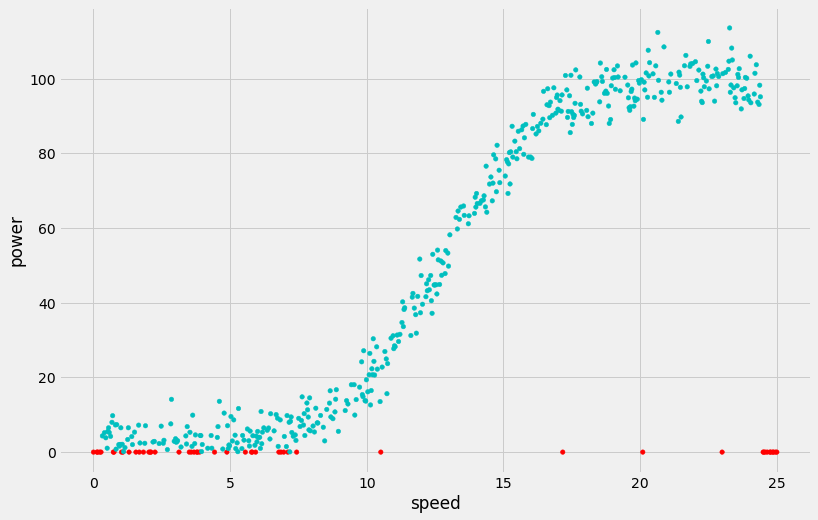

In [8]:
# Highlighting zero values - adapted from https://stackoverflow.com/a/46265462
colours = np.where(data["power"]==0,"r","c")
data.plot.scatter(x="speed", y="power", c=colours)
plt.show()

In [9]:
# Number of entries where the power value is 0 - adapted from https://stackoverflow.com/a/18173074
data[data.power == 0].count()

speed    49
power    49
dtype: int64

In all, 49 of the 500 power values are zero, which is quite a substantial proportion at nearly 10%. While the reasoning for this at the head and tail of the data set is explained above, once a turbine hits the cut-in speed and starts generating power, it would be expected that there is a recorded power output for each wind speed. Perhaps there were malfunctions, input errors or data corruption[<sup>6</sup>](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/) on these occasions that prohibited a power measurement from being taken. Whatever the reason, these outliers need to be dealt with in order to prevent them from harming a model's performance.[<sup>7</sup>](https://towardsdatascience.com/increase-model-performance-by-removing-data-a87d05183d7c)

Machine learning algorithms are trained based on the data supplied to them and so can be very sensitive to outliers.[<sup>8</sup>](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) A zero power value would not provide a model with useful training information as there should be no reason for such a value if the wind turbine is operating correctly, outside of error/malfunction. Because of this, I made the decision to remove these figures from the dataset before proceeding.

In [10]:
# Data set without zeros - adapted from  https://stackoverflow.com/a/24489602
data_new = data[data.power != 0]

# Descriptive statistics of the new data
data_new.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


***

## Models

The aim of this project is to create a predictive model based on the speed and power data. This model should be able to take in a new wind speed measurement and accurately predict what the power output would be. Below I have compared the following models: 

- Linear Regression
- Polynomial Regression
- Decision Tree Regression
- Random Forest Regression

With the Python package, sklearn, these models are very easy to train and test. I also decided to train a neural network with keras to see how it performs compared to these machine learning models.  

Before creating any models, however, the data is converted to a numpy array, which is what machine learning algorithms in Python work with,[<sup>9</sup>](https://becominghuman.ai/an-essential-guide-to-numpy-for-machine-learning-in-python-5615e1758301) and then split into training and testing sets. The latter is not mandatory but testing a model with known values helps with evaluation.[<sup>10</sup>](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) Here I decided to hold back 10% of the data for testing purposes, leaving 405 rows to train the models and 46 rows to test them. 

In [11]:
# Splitting data set and converting to numpy arrays
x = data_new['speed'].values.reshape(-1,1)
y = data_new['power'].values.reshape(-1,1)

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

# The sizes of each training and testing variable
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 1) (46, 1) (405, 1) (46, 1)


### Linear Regression and Polynomial Regression

This data set represents the relationship between wind speed and power, specifically what the power output is for each measurement of wind speed. Therefore, power is a dependent variable that is determined by the independent variable, wind speed. Such a relationship is generally assessed with regression analysis.[<sup>11</sup>](https://en.wikipedia.org/wiki/Regression_analysis) Considering the data's resemblance to a sigmoid function, I thought this might be a good place to start. The sigmoid function can also be referred to as the logistic function, which is at the core of logistic regression.[<sup>12</sup>](https://machinelearningmastery.com/logistic-regression-for-machine-learning/) However, logistic regression is usually used to classify a categorical/binary dependent variable, i.e. a variable with two outcomes that can be represented by the sigmoid function with each observation as either end of the "S" as follows:

<img src="https://miro.medium.com/max/875/1*XisqJi764DTxragiRFexSQ.png" alt="Logistic Function for Regression" width="500"/>

This would not be suitable for our data, which represents a continuous range of power values. Usually the best place to start with regression of a continuous dependent variable is linear regression.[<sup>13</sup>](https://statisticsbyjim.com/regression/choosing-regression-analysis/) Since there is only one independent and one dependent variable here, I can use simple linear regression. Such a model attempts to fit a straight line to the data and makes predictions by finding the y-value (power) based on where the x-value (speed) falls on that line. The regression plot below shows the best fitting line for the data.

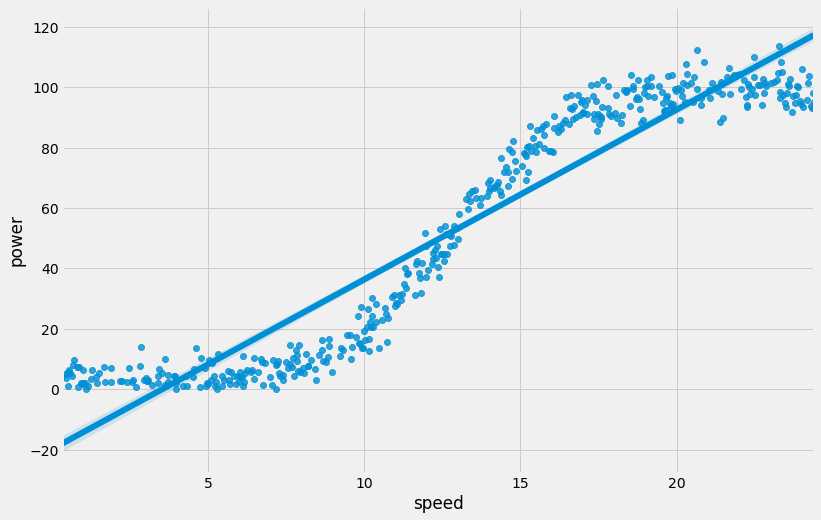

In [12]:
# Plotting the line of best fit
sns.regplot(x="speed", y="power", data=data_new)
plt.show()

Below the model is initialised and trained with the training data.

In [13]:
# Creating the model 
lin_model = LinearRegression()

# Training the model with training data
lin_model.fit(x_train, y_train)

LinearRegression()

To check the model, the x_test data is passed to it with the predict function. The model will return the predicted power values, which can then be compared to the actual values from the data set. Looking at the actual and predicted values side-by-side demonstrates a lot of discrepancy, indicating that this model may not be suitable for our needs. 

In [14]:
# Testing prediction
lin_pred = lin_model.predict(x_test)

# Comparing predictions against acutal values.
test_lin = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
test_lin

,Actual,Predicted
0,91.491,75.949338
1,1.360,-2.064673
2,44.745,50.225158
3,33.589,43.866118
4,5.385,25.494931
5,69.240,58.990016
6,3.912,13.906344
7,26.927,40.054083
8,90.171,74.678659
9,65.605,55.737079


Even though it seems clear that this model is not a great fit for the data, below shows the results of some of the main metrics used to assess regression models.[<sup>14</sup>](https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d)   

In [15]:
# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))  # very sensitive to outlliers
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, lin_pred))

Mean Absolute Error: 12.620463211784266
Mean Squared Error: 208.75693314524594
Root Mean Squared Error: 14.448423206192638
R-squared: 0.8684522097682367


- **Mean Absolute Error (MAE)**: Measures the average distance between the actual values and the predicted values. The figure above shows that the model is off by an average of 12.6kW, which, when the range is between 0-113, is quite a significant margin of error.
- **Mean Squared Error (MSE) / Root Mean Squared Error (RMSE)**: To get the MSE the distances between actual and predicted values are squared, meaning that larger discrepancies yield larger errors. The RMSE is then the square root of this value and is useful over the MAE when large errors are particularly undesirable,[<sup>15</sup>](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) as they would be in a model designed to make accurate predictions.  
- **R-Squared Coefficient of Determination**: This indicates how strong the linear relationship is between two variables.[<sup>16</sup>](https://www.investopedia.com/terms/c/coefficient-of-determination.asp) It is used to assess how close the data is to the regression line or how well the model has fit the data[<sup>17</sup>](https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the) and should be read as a percentage, i.e. if the value above is 0.86, then it could be said that 86% of the data points fall within the regression line.[<sup>18</sup>](https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/) Even though the R-squared value appears to indicate a good fit, the high MAE and RMSE figures shows that there are a large amount of errors. The R-squared value cannot be entirely trusted on its own because if the model consistently over or under-estimates predictions, they can essentially cancel each other out if they're symmetrical enough and result in a good R-squared value.[<sup>19</sup>](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) The way the line passes through the data in the previously plotted line of best fit indicates that this may be the case here. 

It should not be surprising that this model is not a good fit as it is trying to fit a straight line to "curvy" data. In cases where a correlation exists between variables but the relationship does not appear to be strictly linear, we can try to fit a curved line to the data with polynomial regression.[<sup>20</sup>](https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb) This is very similar to linear regression but models on a line that is structured depending on the degree of the polynomial.[<sup>21</sup>](https://towardsdatascience.com/polynomial-regression-the-only-introduction-youll-need-49a6fb2b86de) Where a linear function has a degree of 1, a polynomial can model quadratic (2 degrees), cubic (3 degrees) and higher functions. Some of these are illustrated in the graph below:

<img src="https://muthu.co/wp-content/uploads/2018/06/slide_4.jpg" alt="Polynomial Functions" width="500"/>

Below the training data is transformed to have polynomial features with a degree of 3. This value was chosen because the shape of the data looks similar to the cubic function above. Linear regression is performed on the altered data in the same way as simple linear regression. However, when making predictions with this model, any data passed to it needs to be adjusted with polynomial features.

In [16]:
# Polynomial Regression - adapted from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 

# Generate polynomial features with a degree of 3
poly_features = PolynomialFeatures(degree=3)

# Transform training data
x_train_poly = poly_features.fit_transform(x_train)

# Create the model with linear regression
poly_model = LinearRegression()

# Fit the model with the polynomial data
poly_model.fit(x_train_poly, y_train)

# Make predictions
poly_pred = poly_model.predict(poly_features.fit_transform(x_test))

# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  # very sensitive to outlliers
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, poly_pred))

Mean Absolute Error: 5.367990418631759
Mean Squared Error: 43.030110914200016
Root Mean Squared Error: 6.559734058191689
R-squared: 0.9728846562415616


The metrics for the polynomial model look to be a huge improvement over simple linear regression with the MAE and RMSE values less than half of those measured previously. The R-squared value is also higher, which indicates this model is a  better fit with fewer errors 

Both model's predictions of the test data are plotted below along with the actual values in blue. As expected, the linear regression model's predictions run across a straight line, while the polynomial model follows the flow of the actual data much more closely.

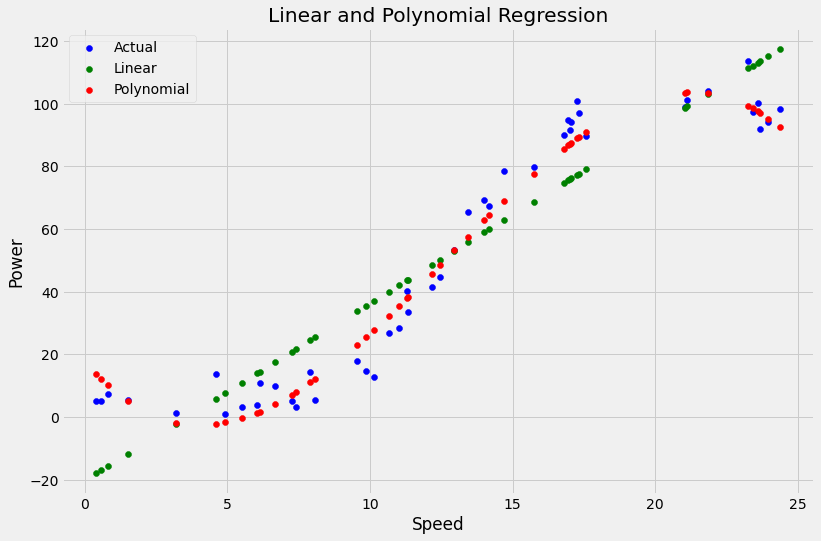

In [17]:
# Visualising Linear and Polynomial Regression - adapted from https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, lin_pred, color = 'green')
plt.scatter(x_test, poly_pred, color = 'red')
plt.title('Linear and Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Actual", "Linear", "Polynomial")
plt.legend(labels)
plt.show()

### Decision Tree Regression and Random Forest Regression

While the polynomial model appears to fit the data well, it still operates along a single continuous line. It matches the shape of the data, but the data itself is more dispersed than a line can represent. For this reason, I decided to look at some non-linear models. I thought perhaps a model that is trained by breaking the data into smaller pieces might be more useful than one that tries to fit data to a line.  

Decision tree regression  is a commonly used non-linear algorithm that recursively partitions data into smaller and smaller subsets with decisions in between them.[<sup>22</sup>](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda) The whole data set represents the root node, which is split into interior nodes based on the features of the data set. The branches from each node represent the decisions, such as True/False, and the outcomes are represented in the leaf nodes. This forms a tree-like structure, which can be visualised below

<img src="https://miro.medium.com/max/875/0*IY07ftCHvVuuw35_.png" alt="Decision Tree Graph" width="600"/>

Creating the model works much the same way as linear regression and the same metrics are used below to evaluate it.

In [18]:
# Decision Tree Regression - adapted from https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
# Creating model
tree_model = DecisionTreeRegressor()

# Training the model
tree_model.fit(x_train, y_train)

# Making predictions
tree_pred = tree_model.predict(x_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))  # very sensitive to outlliers 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, tree_pred))

Mean Absolute Error: 4.029108695652174
Mean Squared Error: 27.77859906521739
Root Mean Squared Error: 5.270540680539084
R-squared: 0.9824953678533829


Improvements are seen again here with smaller MAE and RMSE values and a more improved R-squared value than polynomial regression. However, decision trees can be problematic in that they are prone to over-fitting the data.[<sup>23</sup>](https://www.saedsayad.com/decision_tree_overfitting.htm) This means that the model fits the data too closely and so it has problems generalising and making predictions based on new data.[<sup>24</sup>](https://www.investopedia.com/terms/o/overfitting.asp) 
This problem can be resolved with random forest regression.[<sup>25</sup>](https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda) This works by creating several randomly generated decision trees that are based on subsets of the data and getting the mean of their results to produce the final outcome.[<sup>26</sup>](https://en.wikipedia.org/wiki/Random_forest) Since it contains multiple decision trees, it does not have the same over-fitting issues as a a single decision tree model. 

Below a random forest ensemble model is generated for our data. The function allows you to choose the number of values from the dataset to become the root nodes for the decision trees. I have decided to leave this at the default value of 100 as the data set isn't very large or complex and it can be difficult to determine the optimal number of trees.[<sup>27</sup>](https://link.springer.com/chapter/10.1007/978-3-642-31537-4_13)

In [19]:
# Random Forest Regression - adapted from https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153
# with help from https://stackoverflow.com/a/36120015

# Creating the model
forest_model = RandomForestRegressor()

# Training the model
forest_model.fit(x_train, y_train.ravel())

# Making predictions
forest_pred = forest_model.predict(x_test)

# Evaluating the model
forestMAE = metrics.mean_absolute_error(y_test, forest_pred)  
forestMSE = metrics.mean_squared_error(y_test, forest_pred)
forestRMSE = metrics.mean_squared_error(y_test, forest_pred, squared=False)
forestR2 = metrics.r2_score(y_test, forest_pred)

print('Mean Absolute Error:', forestMAE)
print('Mean Squared Error:', forestMSE)
print('Root Mean Squared Error:', forestRMSE)
print('R-squared:', forestR2)

Mean Absolute Error: 3.680973695652174
Mean Squared Error: 22.56211109038471
Root Mean Squared Error: 4.749959061969347
R-squared: 0.9857825279755444


The metrics for random forest regression are a slight improvement on those of decision tree regression and we also don't need to worry about over-fitting the data. Below I've plotted the predictions of the testing data for both models against the actual values and they look pretty closely aligned.

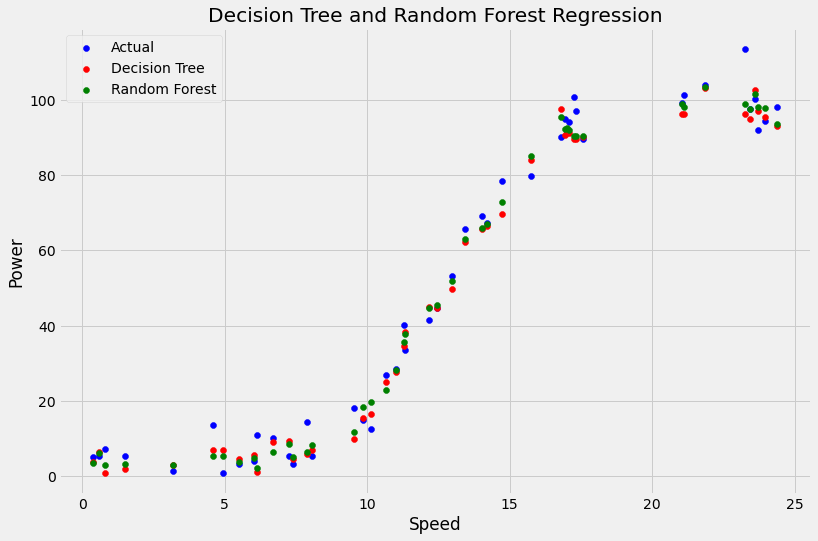

In [20]:
# Plotting decision tree and random forest regression predictions
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, tree_pred, color = 'red')
plt.scatter(x_test, forest_pred, color = 'green')
plt.title('Decision Tree and Random Forest Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Actual", "Decision Tree", "Random Forest")
plt.legend(labels)
plt.show()

### Passing New Data to the Regression Models

Below new data has been created, passed to each model and the predictions plotted.

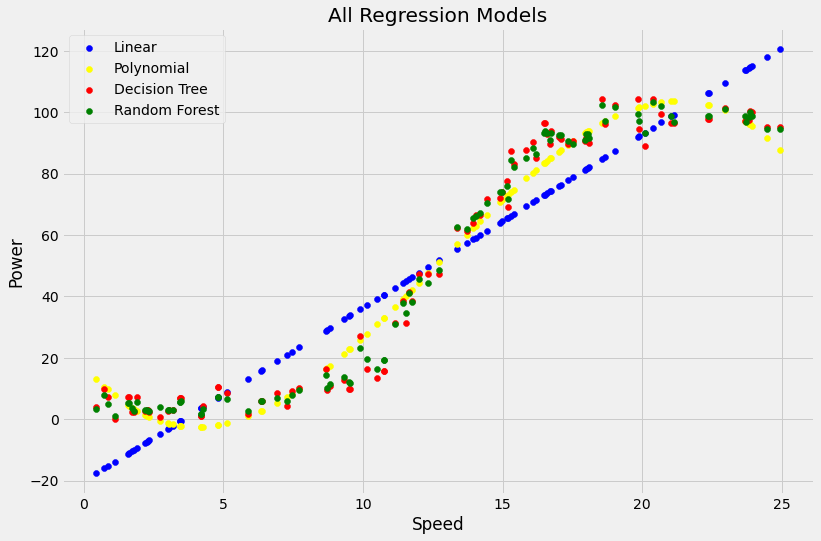

In [21]:
# Create new data and reshape
new = np.random.uniform(0, 25, 100)
new = new.reshape(-1, 1)

# Passing to models
lin_new_pred = lin_model.predict(new)
poly_new_pred = poly_model.predict(poly_features.fit_transform(new))
forest_new_pred = forest_model.predict(new)
tree_new_pred = tree_model.predict(new)

# Plotting all regression models with new data
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(new, lin_new_pred, color = 'blue')
plt.scatter(new, poly_new_pred, color = 'yellow')
plt.scatter(new, tree_new_pred, color = 'red')
plt.scatter(new, forest_new_pred, color = 'green')
plt.title('All Regression Models')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Linear", "Polynomial", "Decision Tree", "Random Forest")
plt.legend(labels)
plt.show()

This demonstrates how predictions based on the new data are fit to the shape of each model, with linear regression making predictions on a straight blue line and polynomial regression doing so on a cubic yellow line. Decision tree and random forest regression models are represented by red and green dots respectively, scattered in the overall shape of the original data set.

Overall, based on the metrics of the test data and the shape of the data in the data set, the most suitable model here is random forest regression. 

## Neural Network

The models developed above are based on supervised machine learning algorithms, which learn from a given set of data values and apply what they learn to new data. A predictive model can also be built with a deep learning algorithm, which works by layering machine learning algorithms to create an artificial neural network that can eventually make decisions independently.[<sup>28</sup>](https://www.zendesk.com/blog/machine-learning-and-deep-learning/)

I found that it took a lot of trial and error to build a neural network that performed better than random forest regression, as I tried many different numbers of hidden layers/neurons and different activations/optimizers. Choosing the number of hidden layers and neurons in each layer can be quite difficult[<sup>29</sup>](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/) but I found I achieved good performance with 2 layers that have 20 neurons in the first and 1 in the second. Performance of the model was based on the mean squared error, as this was used in the evaluation of the regression models. 

- Layer 1 has 20 neurons and uses the *tanh* activation function. I had initially used *sigmoid* activation as the shape of the data is sigmoid but got improved performance from *tanh*, which is also sigmoidal in shape but has been noted to perform slightly better.[<sup>30</sup>](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6#) I settled on 20 neurons in this layer as the model seemed to perform best with this figure; smaller numbers had a higher MSE and larger numbers did not seem to improve the accuracy and so were deemed unnecessary.
- Layer 2 has a single neuron and uses a *linear* activation. This is often used as the final layer when dealing with continuous variables as it helps to keep results consistent.[<sup>31</sup>](http://www.wardsystems.com/manuals/neuroshell2/index.html?scalingandactivationfunctions.htm) Although some recommend no last-layer activation in regression problems,[<sup>32</sup>](https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/) I found that using *linear* activation yielded better results.

The model is compiled with loss set to *mse* for mean squared error, which is the metric we are most interested in when comparing it to the regression models. The optimizer is set to *adam*, which adjusts the weights on each node after every prediction to improve accuracy, and is a popular algorithm used in practice as it achieves good results quickly and relatively efficiently.[<sup>33</sup>](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

The model is then fit to the training data, taking batches of 20 data points, which makes the training faster,[<sup>34</sup>](https://stackoverflow.com/a/38405970) and runs 475 times. Different figures were tried for batch size and epochs and these figures seemed to yield the best results without redundancy.

In [22]:
# Create model
keras_model = kr.models.Sequential()

# Add layers
keras_model.add(kr.layers.Dense(20, activation = "tanh", input_shape=[1]))
keras_model.add(kr.layers.Dense(1, activation = "linear"))

# Compiling the model
keras_model.compile(loss="mse", optimizer="adam")

# Fitting the model
keras_model.fit(x_train, y_train, epochs=475, batch_size=20)

Epoch 1/475
21/21 [==============================] - 1s 2ms/step - loss: 4722.0523
Epoch 2/475
21/21 [==============================] - 0s 2ms/step - loss: 4780.3058
Epoch 3/475
21/21 [==============================] - 0s 2ms/step - loss: 4574.7587
Epoch 4/475
21/21 [==============================] - 0s 2ms/step - loss: 4558.3908
Epoch 5/475
21/21 [==============================] - 0s 2ms/step - loss: 4288.3372
Epoch 6/475
21/21 [==============================] - 0s 2ms/step - loss: 4313.6323
Epoch 7/475
21/21 [==============================] - 0s 2ms/step - loss: 4306.6105
Epoch 8/475
21/21 [==============================] - 0s 2ms/step - loss: 4277.4102
Epoch 9/475
21/21 [==============================] - 0s 2ms/step - loss: 4329.3139
Epoch 10/475
21/21 [==============================] - 0s 2ms/step - loss: 4029.1081
Epoch 11/475
21/21 [==============================] - 0s 2ms/step - loss: 3942.0966
Epoch 12/475
21/21 [==============================] - 0s 2ms/step - loss: 3869.3145
E

21/21 [==============================] - 0s 2ms/step - loss: 1539.1365
Epoch 99/475
21/21 [==============================] - 0s 2ms/step - loss: 1552.2035
Epoch 100/475
21/21 [==============================] - 0s 2ms/step - loss: 1652.5122
Epoch 101/475
21/21 [==============================] - 0s 2ms/step - loss: 1499.8377
Epoch 102/475
21/21 [==============================] - 0s 1ms/step - loss: 1502.3522
Epoch 103/475
21/21 [==============================] - 0s 2ms/step - loss: 1469.5410
Epoch 104/475
21/21 [==============================] - 0s 2ms/step - loss: 1411.3438
Epoch 105/475
21/21 [==============================] - 0s 2ms/step - loss: 1477.6865
Epoch 106/475
21/21 [==============================] - 0s 2ms/step - loss: 1393.4914
Epoch 107/475
21/21 [==============================] - 0s 1ms/step - loss: 1450.9306
Epoch 108/475
21/21 [==============================] - 0s 2ms/step - loss: 1327.0965
Epoch 109/475
21/21 [==============================] - 0s 2ms/step - loss: 1390.

21/21 [==============================] - 0s 2ms/step - loss: 396.0730
Epoch 196/475
21/21 [==============================] - 0s 2ms/step - loss: 398.6225
Epoch 197/475
21/21 [==============================] - 0s 2ms/step - loss: 411.2945
Epoch 198/475
21/21 [==============================] - 0s 2ms/step - loss: 395.1692
Epoch 199/475
21/21 [==============================] - 0s 2ms/step - loss: 417.5402
Epoch 200/475
21/21 [==============================] - 0s 2ms/step - loss: 374.4862
Epoch 201/475
21/21 [==============================] - 0s 2ms/step - loss: 351.7857
Epoch 202/475
21/21 [==============================] - 0s 2ms/step - loss: 407.8008
Epoch 203/475
21/21 [==============================] - 0s 2ms/step - loss: 349.2354
Epoch 204/475
21/21 [==============================] - 0s 2ms/step - loss: 320.1603
Epoch 205/475
21/21 [==============================] - 0s 1ms/step - loss: 354.8307
Epoch 206/475
21/21 [==============================] - 0s 2ms/step - loss: 332.1457
Epoch 

21/21 [==============================] - 0s 2ms/step - loss: 63.7551
Epoch 293/475
21/21 [==============================] - 0s 2ms/step - loss: 63.2690
Epoch 294/475
21/21 [==============================] - 0s 1ms/step - loss: 65.8211
Epoch 295/475
21/21 [==============================] - 0s 2ms/step - loss: 58.7622
Epoch 296/475
21/21 [==============================] - 0s 2ms/step - loss: 56.7956
Epoch 297/475
21/21 [==============================] - 0s 2ms/step - loss: 57.1853
Epoch 298/475
21/21 [==============================] - 0s 2ms/step - loss: 54.3456
Epoch 299/475
21/21 [==============================] - 0s 2ms/step - loss: 51.6204
Epoch 300/475
21/21 [==============================] - 0s 2ms/step - loss: 57.9699
Epoch 301/475
21/21 [==============================] - 0s 2ms/step - loss: 53.1598
Epoch 302/475
21/21 [==============================] - 0s 2ms/step - loss: 52.1844
Epoch 303/475
21/21 [==============================] - 0s 2ms/step - loss: 46.8595
Epoch 304/475
21/2

21/21 [==============================] - 0s 2ms/step - loss: 16.9562
Epoch 391/475
21/21 [==============================] - 0s 2ms/step - loss: 15.9070
Epoch 392/475
21/21 [==============================] - 0s 1ms/step - loss: 17.7724
Epoch 393/475
21/21 [==============================] - 0s 1ms/step - loss: 18.7415
Epoch 394/475
21/21 [==============================] - 0s 1ms/step - loss: 18.0162
Epoch 395/475
21/21 [==============================] - 0s 1ms/step - loss: 15.6682
Epoch 396/475
21/21 [==============================] - 0s 2ms/step - loss: 18.0582
Epoch 397/475
21/21 [==============================] - 0s 2ms/step - loss: 16.8940
Epoch 398/475
21/21 [==============================] - 0s 2ms/step - loss: 17.5386
Epoch 399/475
21/21 [==============================] - 0s 2ms/step - loss: 16.9314
Epoch 400/475
21/21 [==============================] - 0s 2ms/step - loss: 16.8409
Epoch 401/475
21/21 [==============================] - 0s 2ms/step - loss: 19.0843
Epoch 402/475
21/2

In [23]:
# Making predictions
keras_pred = keras_model.predict(x_test)

# Evaluating the neural network
kerasMAE = metrics.mean_absolute_error(y_test, keras_pred)  
kerasMSE = metrics.mean_squared_error(y_test, keras_pred)
kerasRMSE = metrics.mean_squared_error(y_test, keras_pred, squared=False)
kerasR2 = metrics.r2_score(y_test, keras_pred)

print('Mean Absolute Error:', kerasMAE)
print('Mean Squared Error:', kerasMSE)
print('Root Mean Squared Error:', kerasRMSE)
print('R-squared:', kerasR2)

Mean Absolute Error: 3.5206620109392253
Mean Squared Error: 20.3406835872276
Root Mean Squared Error: 4.510064698785107
R-squared: 0.9871823563539249


The metrics for this model show that it is slightly better than random forest. These metrics for both are plotted together below. 

In [24]:
# Getting the metrics
forest_metrics = [forestMAE, forestMSE, forestRMSE, forestR2]
keras_metrics = [kerasMAE, kerasMSE, kerasRMSE, kerasR2]

# Putting the metrics indo a dataframe
metrics= pd.DataFrame({'Forest': forest_metrics, 'Keras': keras_metrics}, index=["MAE", "MSE", "RMSE", "R-Squared"])
metrics

,Forest,Keras
MAE,3.680974,3.520662
MSE,22.562111,20.340684
RMSE,4.749959,4.510065
R-Squared,0.985783,0.987182


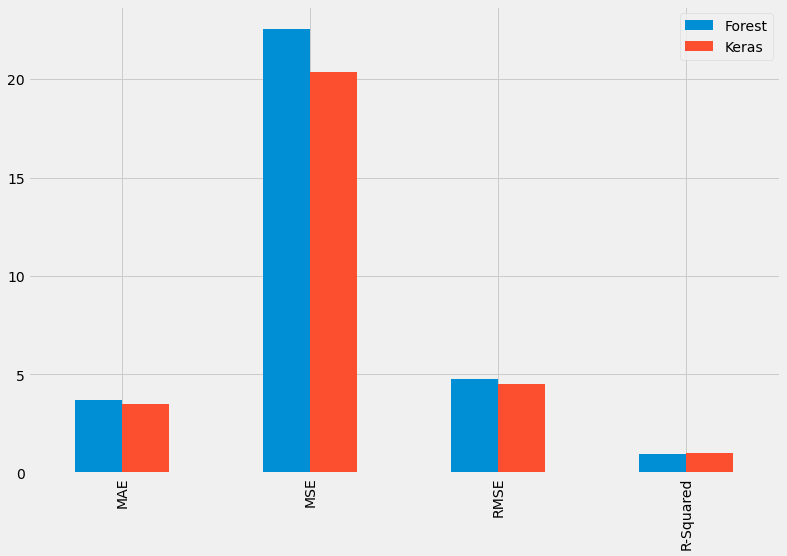

In [25]:
# Plotting the metrics
metrics.plot.bar()
plt.show()

Considering how close the metrics are, a neural network is probably overkill for the power production data. Neural networks are complex, computationally expensive, slow to train, and work best with large amounts of data.[<sup>35</sup>](https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89) However, the data set used here is quite small and the relationship being examined is not complicated. For tabular data, such as that being used here, random forest is generally the better choice.[<sup>36</sup>](https://www.kdnuggets.com/2019/06/random-forest-vs-neural-network.html) It is also computationally less expensive than a neural network, faster to train, and better at understanding the variables in the data.[<sup>37</sup>](https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89) Interestingly, tree-based methods like random forest have been referred to as simplified neural networks in the way they break down data[<sup>38</sup>](https://towardsdatascience.com/when-and-why-tree-based-models-often-outperform-neural-networks-ceba9ecd0fd8) so perhaps this is why they have performed similarly with this data set.   

While the neural network performs slightly better, I don't think the difference is large enough to justify its use. I have decided to choose the random forest regression model for implementation in the web application as it has good performance metrics, is not prone to over-fitting, and is less complex, time-consuming and computationally expensive than the neural network. 

## Using the Model

Below the random forest model is exported to a pickle file to be used in the web application. The pickle module converts the model to streams of bytes and stores it in a file  where it can be used by other applications.[<sup>39</sup>](http://zetcode.com/python/pickle/) 

In [26]:
# Pickling random forest model
filename1 = "model.pkl"

# Dumping data in the file 
pickle.dump(forest_model, open(filename1, "wb"))

## References

1. Pearson's correlation coefficient: https://www.statisticssolutions.com/pearsons-correlation-coefficient/
2. Sigmoid function https://en.wikipedia.org/wiki/Sigmoid_function
3. Wind power curves and sigmoid function: https://neerajdhanraj.medium.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f
4. Wind turbine characteristics 1: http://owi-lab.com/content/modelling-power-curves-offshore-wind-turbines-machine-learning 
5. Wind turbine characteristics 2: http://mstudioblackboard.tudelft.nl/duwind/Wind%20energy%20online%20reader/Static_pages/power_curve.htm
6. Possible reasons for outliers: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
7. Outliers harming model: https://towardsdatascience.com/increase-model-performance-by-removing-data-a87d05183d7c
8. Machine learning models sensitive to outliers: https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning
9. Data to be converted to numpy array for machine learning: https://becominghuman.ai/an-essential-guide-to-numpy-for-machine-learning-in-python-5615e1758301
10. Train-test split: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
11. Regression analysis: https://en.wikipedia.org/wiki/Regression_analysis
12. Sigmoid/logistic function and logistic regression: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
13. Linear regression for continuous dependent variable: https://statisticsbyjim.com/regression/choosing-regression-analysis/
14. Metrics for regression models: https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d
15. RMSE versus MAE: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
16. R-squared coefficient of determination: https://www.investopedia.com/terms/c/coefficient-of-determination.asp
17. R-squared interpretation: https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
18. R-squared as a percentage value: https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
19. Limitations of r-squared value: https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
20. Polynomial regression: https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb
21. Degree of the polynomial: https://towardsdatascience.com/polynomial-regression-the-only-introduction-youll-need-49a6fb2b86de
22. Decision tree regression: https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
23. Decision tree over-fitting: https://www.saedsayad.com/decision_tree_overfitting.htm
24. Over-fitting definition: https://www.investopedia.com/terms/o/overfitting.asp 
25. Random forest solving over-fitting: https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
26. Random forest regression: https://en.wikipedia.org/wiki/Random_forest
27. Difficulty in determining number of trees: https://link.springer.com/chapter/10.1007/978-3-642-31537-4_13
28. Machine learning and deep learning: https://www.zendesk.com/blog/machine-learning-and-deep-learning/
29. Choosing number of layers and neurons: https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
30. tanh versus sigmoid activation: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6#
31. linear activation final layer: http://www.wardsystems.com/manuals/neuroshell2/index.html?scalingandactivationfunctions.htm
32. No activation for last layer in regression problems: https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
33. Adam optimisation: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
34. Using batches for faster training: https://stackoverflow.com/a/38405970
35. Neural network details: https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89
36. Random forest for tabular data: https://www.kdnuggets.com/2019/06/random-forest-vs-neural-network.html
37. Advantages of random forest over neural network: https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89
38. Random forest as a simplified neural network: https://towardsdatascience.com/when-and-why-tree-based-models-often-outperform-neural-networks-ceba9ecd0fd8
39. Function of the pickle module: http://zetcode.com/python/pickle/